# Build models

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics

## Separate training and test datasets

In [2]:
# Load dataset
dataset = pd.read_csv('../save/all_data.csv')

In [3]:
# Further delete unusable listings 
dataset = dataset[pd.isnull(dataset['host_since']).values==False]
dataset = dataset[pd.isnull(dataset['bedrooms']).values==False]

In [4]:
# Separate training and test data
ids = dataset.id.unique()
np.random.shuffle(ids)
ids_train = ids[:int(0.8 * len(ids))]
ids_test = ids[int(0.8 * len(ids)):]
dataset_train = dataset[dataset['id'].isin(ids_train)].drop(columns='id')
dataset_test = dataset[dataset['id'].isin(ids_test)].drop(columns='id')

In [5]:
# Get features and target
x_train = dataset_train.drop(columns = 'price').values
y_train = np.log(dataset_train['price'].values)

x_test = dataset_test.drop(columns = 'price').values
y_test = np.log(dataset_test['price'].values)

## Train models

### - Random Forest

In [6]:
# Without cross-validation
rf = RandomForestRegressor(n_estimators = 20)
rf.fit(x_train, y_train)
rf.score(x_test, y_test)

0.626132697098839

In [ ]:
# Cross-validation
rf = RandomForestRegressor(n_estimators = 20, max_features = 0.8)

param_grid = {'min_samples_leaf': [2, 5, 8, 12]}

cv = GridSearchCV(rf, param_grid, cv = 5)
cv.fit(x_train, y_train)
cv.best_estimator_

In [27]:
# Training 
rf_optm = RandomForestRegressor()
rf_optm.fit(x_train, y_train)

# Test
rf_optm.score(x_test, y_test)
y_predict = rf_optm.predict(x_test)
error = metrics.median_absolute_error(y_test, y_predict)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [29]:
metrics.median_absolute_error(y_test, np.exp(prediction))

27.294618271352974

### - XGBoost

In [53]:
# dtrain = xgb.DMatrix('./data/agaricus.txt.train')
# dtest = xgb.DMatrix('./data/agaricus.txt.test')
dtrain = xgb.DMatrix(x_train[:], label=y_train)
dtest = xgb.DMatrix(x_test[:], label=y_test)
# specify parameters via map
param = {'max_depth':6, 'eta':0.3, 'lambda':1, 
         'silent':1, 'objective':'reg:linear', 
         'tree_method':'gpu_hist', 'eval_metric':'rmse'}
num_round = 20
bst = xgb.train(param, dtrain, num_round)
# make prediction
preds = bst.predict(dtest)

In [54]:
metrics.median_absolute_error(np.exp(y_test), np.exp(preds))

27.733661651611314

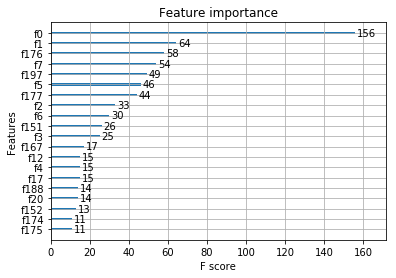

In [55]:
xgb.plot_importance(bst, max_num_features = 20)

### - GBDT

In [49]:
dataset_train.columns.values[5]

'minimum_nights'

In [21]:
max(dataset_train[dataset_train.columns.values[7]])

13.736984342210164

(array([819176.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

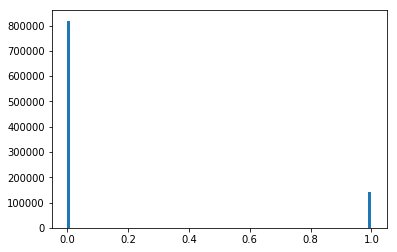

In [44]:
plt.hist(dataset_train[dataset_train.columns.values[197]],  bins=100)